In [109]:
!pip install tensorflow

In [110]:

!pip install opencv-python
!pip install matplotlib

In [111]:
!pip list

Package                          Version
-------------------------------- ---------------------
absl-py                          1.4.0
aiohttp                          3.9.1
aiosignal                        1.3.1
alabaster                        0.7.13
albumentations                   1.3.1
altair                           4.2.2
anyio                            3.7.1
appdirs                          1.4.4
argon2-cffi                      23.1.0
argon2-cffi-bindings             21.2.0
array-record                     0.5.0
arviz                            0.15.1
astropy                          5.3.4
astunparse                       1.6.3
async-timeout                    4.0.3
atpublic                         4.0
attrs                            23.1.0
audioread                        3.0.1
autograd                         1.6.2
Babel                            2.14.0
backcall                         0.2.0
beautifulsoup4                   4.11.2
bidict                           0.22.1
b

In [112]:
import tensorflow as tf
import os


In [113]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [114]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [115]:
#removing non relevent images

In [116]:
import cv2
import imghdr

In [117]:
data_dir = '/content/drive/MyDrive/image classification using CNN/data'

In [118]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [119]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

In [120]:
#loading data

In [121]:
import numpy as np
from matplotlib import pyplot as plt

In [122]:
data = tf.keras.utils.image_dataset_from_directory('/content/drive/MyDrive/image classification using CNN/data')

Found 304 files belonging to 2 classes.


In [123]:
data_iterator = data.as_numpy_iterator()

batch = data_iterator.next()

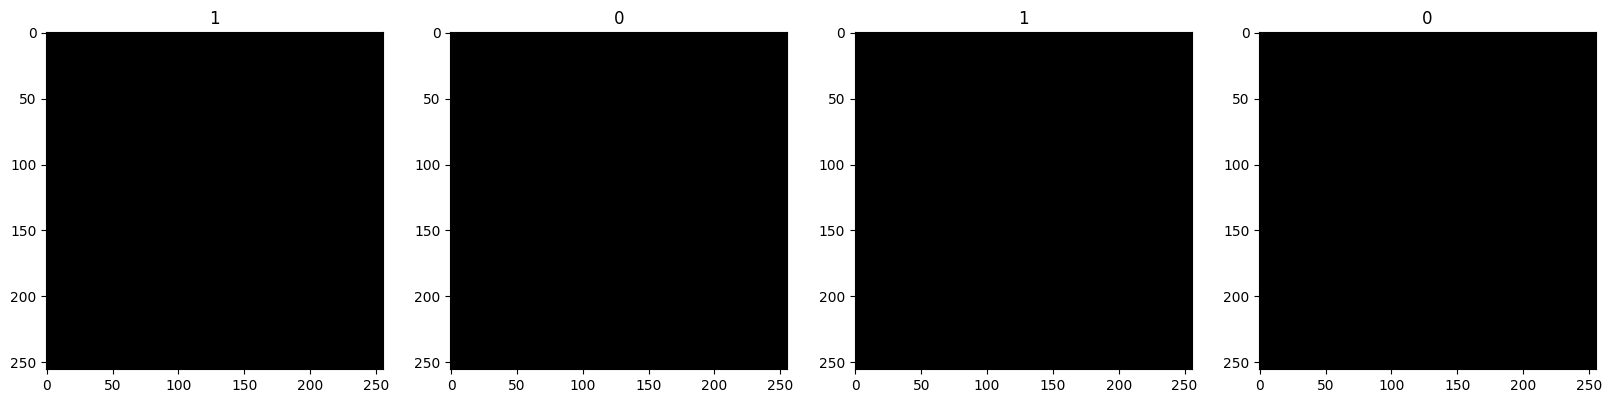

In [124]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])
    # 1 sad
    # 0 happy

In [125]:
#Scale data

In [126]:
data = data.map(lambda x,y: (x/255, y))

data.as_numpy_iterator().next()

In [127]:
#split data

In [128]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [129]:
data = data.map(lambda x,y: (x/255, y))

In [130]:
data.as_numpy_iterator().next()

(array([[[[0.00031719, 0.00047338, 0.00050414],
          [0.00028499, 0.00040802, 0.00045415],
          [0.00036686, 0.00044375, 0.00050527],
          ...,
          [0.00019656, 0.00025807, 0.00030421],
          [0.00020713, 0.00025423, 0.00030757],
          [0.00022783, 0.00024321, 0.00030472]],
 
         [[0.0003291 , 0.00045935, 0.00050548],
          [0.00028136, 0.00040439, 0.00045053],
          [0.00033113, 0.00044747, 0.00049361],
          ...,
          [0.00019992, 0.00026144, 0.00030757],
          [0.00019992, 0.00026144, 0.00030757],
          [0.00023068, 0.00024606, 0.00030757]],
 
         [[0.00032999, 0.00045302, 0.00049915],
          [0.00028499, 0.00040802, 0.00045415],
          [0.00032632, 0.00044935, 0.00049548],
          ...,
          [0.00018541, 0.00024693, 0.00029306],
          [0.00019881, 0.00026033, 0.00030646],
          [0.00021419, 0.00024717, 0.00030757]],
 
         ...,
 
         [[0.00056773, 0.0008008 , 0.00093587],
          [0.00060

In [131]:
#splitting the data

In [132]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [133]:
train_size

7

In [134]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [135]:
##buinding the model

In [136]:
print(train_size)
print(val_size)
print(test_size )

7
2
1


In [137]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [138]:
model = Sequential()

In [139]:
# model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
# model.add(MaxPooling2D())
# model.add(Conv2D(32, (3,3), 1, activation='relu'))
# model.add(MaxPooling2D())
# model.add(Conv2D(16, (3,3), 1, activation='relu'))
# model.add(MaxPooling2D())
# model.add(Flatten())
# model.add(Dense(256, activation='relu'))
# model.add(Dense(1, activation='sigmoid'))

In [140]:
from tensorflow.keras.layers import BatchNormalization

# Convolutional layers
model.add(Conv2D(32, (3, 3), strides=1, activation='relu', input_shape=(256, 256, 3)))

model.add(MaxPooling2D())

model.add(Conv2D(64, (3, 3), strides=1, activation='relu'))

model.add(MaxPooling2D())

model.add(Conv2D(128, (3, 3), strides=1, activation='relu'))

model.add(MaxPooling2D())

# Flatten layer
model.add(Flatten())

# Dense layers
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))

# Output layer
model.add(Dense(1, activation='sigmoid'))


In [141]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy',tf.keras.metrics.Precision()])

In [142]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 30, 30, 128)      

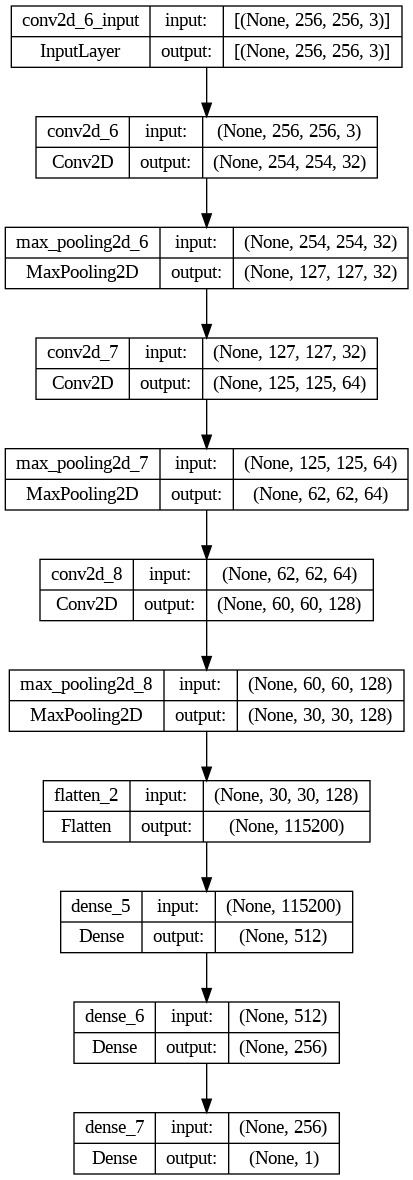

In [143]:
from tensorflow.keras.utils import plot_model

# Assuming 'classifier1' is your Keras model
model1 = model

# Plot the model architecture to a file
plot_model(model1, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

# Display the generated image
from IPython.display import Image
Image(filename='model_plot.png')

In [144]:
#testing

In [145]:
logdir='/content/drive/MyDrive/image classification using CNN/logs'

In [146]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [147]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
7/7 [==============================] - 18s 2s/step - loss: 0.6950 - accuracy: 0.5000 - precision_4: 0.4286 - val_loss: 0.6856 - val_accuracy: 0.6406 - val_precision_4: 0.0000e+00
Epoch 2/20
7/7 [==============================] - 7s 771ms/step - loss: 0.6902 - accuracy: 0.5045 - precision_4: 0.0000e+00 - val_loss: 0.6792 - val_accuracy: 0.5000 - val_precision_4: 0.0000e+00
Epoch 3/20
7/7 [==============================] - 6s 609ms/step - loss: 0.6752 - accuracy: 0.5714 - precision_4: 0.9000 - val_loss: 0.6284 - val_accuracy: 0.7656 - val_precision_4: 0.8824
Epoch 4/20
7/7 [==============================] - 8s 742ms/step - loss: 0.6353 - accuracy: 0.6741 - precision_4: 0.7439 - val_loss: 0.7029 - val_accuracy: 0.5156 - val_precision_4: 1.0000
Epoch 5/20
7/7 [==============================] - 6s 599ms/step - loss: 0.6337 - accuracy: 0.6295 - precision_4: 0.6531 - val_loss: 0.5395 - val_accuracy: 0.7969 - val_precision_4: 0.8000
Epoch 6/20
7/7 [==============================] - 

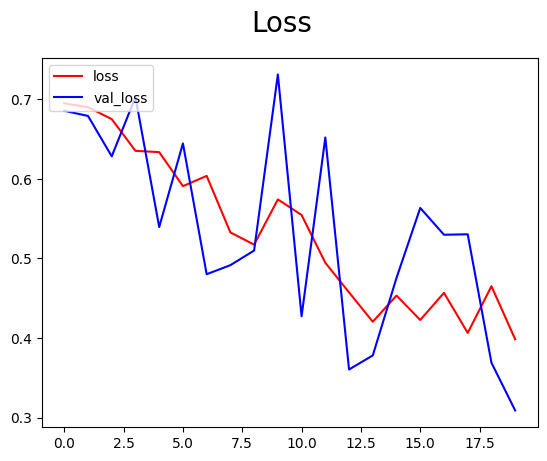

In [148]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='red', label='loss')
plt.plot(hist.history['val_loss'], color='blue', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

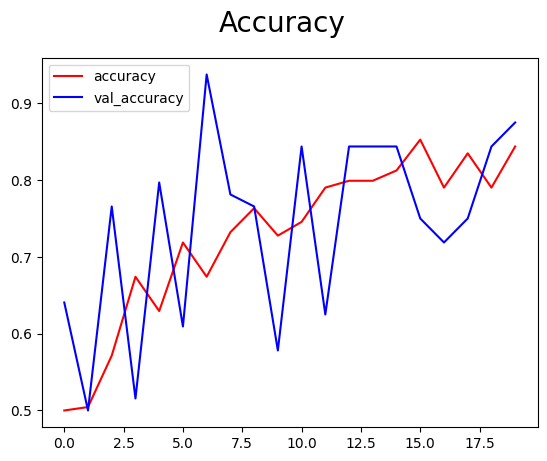

In [149]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='red', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='blue', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [150]:
fig = plt.figure()
plt.plot(hist.history['precision'], color='red', label='precision')
plt.plot(hist.history['val_precision'], color='blue', label='val_precision')
fig.suptitle('Precision', fontsize=20)
plt.legend(loc="upper left")
plt.show()


KeyError: ignored

<Figure size 640x480 with 0 Axes>

In [151]:
#EVALUATE

In [152]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy


In [153]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [154]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 82ms/step


In [155]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.75, shape=(), dtype=float32) tf.Tensor(0.75, shape=(), dtype=float32) tf.Tensor(0.75, shape=(), dtype=float32)


In [156]:
#test

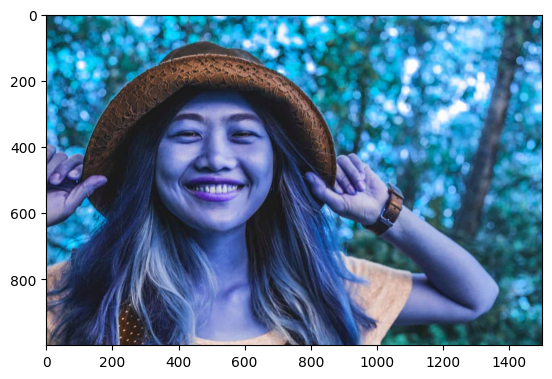

In [157]:
img = cv2.imread('/content/drive/MyDrive/what-makes-people-happy.jpeg')
plt.imshow(img)
plt.show()

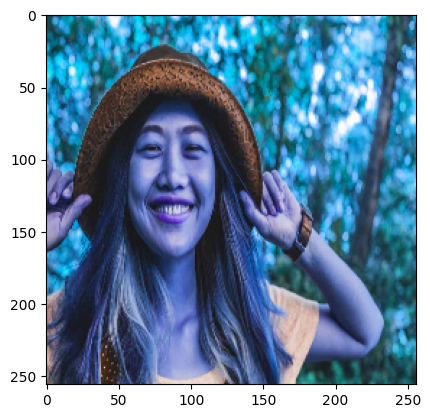

In [158]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [159]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 37ms/step


In [160]:
yhat


array([[0.]], dtype=float32)

In [161]:
if yhat > 0.5:
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Happy


In [167]:
from tensorflow.keras.models import load_model


In [171]:
model.save(os.path.join('/content/drive/MyDrive/image classification using CNN/models','imageclassifier.h5'))

In [173]:
new_model = load_model(os.path.join('/content/drive/MyDrive/image classification using CNN/models','imageclassifier.h5'))

In [166]:
new_model.predict(np.expand_dims(resize/255, 0))